In [91]:
## Notebook 01: Data Loading & Cleaning

#Objective:
# Fetch historical price & volume data for TCS
# Preserve raw data
#Prepare clean dataset for behavioral analysis

# Core libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Data source
import yfinance as yf

                                      

In [11]:
ticker = "TCS.NS"
df = yf.download(
        ticker,
        start = "2019-01-01",
        end = "2024-12-31",
        auto_adjust = True 
)

         

[*********************100%***********************]  1 of 1 completed


In [13]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2019-01-01,1610.928101,1617.023646,1595.858415,1605.171116,1094883
2019-01-02,1628.283569,1637.723180,1608.557533,1612.790579,2100463
2019-01-03,1608.515381,1646.612801,1602.716128,1624.643330,2611668
2019-01-04,1588.958618,1609.573534,1558.607696,1608.557644,4280862
2019-01-07,1606.779785,1616.007847,1592.472068,1601.615489,1856423


In [17]:
df.to_csv("C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/behavioral-bias-detector/data/raw/TCS_raw.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2019-01-01 to 2024-12-30
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TCS.NS)   1480 non-null   float64
 1   (High, TCS.NS)    1480 non-null   float64
 2   (Low, TCS.NS)     1480 non-null   float64
 3   (Open, TCS.NS)    1480 non-null   float64
 4   (Volume, TCS.NS)  1480 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 69.4 KB


In [23]:
df.isnull().sum()

Price   Ticker
Close   TCS.NS    0
High    TCS.NS    0
Low     TCS.NS    0
Open    TCS.NS    0
Volume  TCS.NS    0
dtype: int64

In [21]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,1480.000000,1480.000000,1480.000000,1480.000000,1.480000e+03
mean,2838.476268,2866.552251,2811.251089,2839.380916,2.746767e+06
std,758.893653,763.142677,754.834252,758.402138,1.661153e+06
min,1448.124878,1491.577011,1323.145477,1380.291707,1.548950e+05
25%,1961.264282,1983.722872,1937.960140,1960.636765,1.714430e+06
50%,2980.493896,3006.926585,2954.149076,2981.529053,2.316908e+06
75%,3333.445923,3357.703837,3307.356253,3338.399146,3.224750e+06
max,4389.965820,4427.081095,4349.717095,4411.415210,1.983933e+07


In [25]:
df = df.copy()

In [49]:
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
df

Price,level_0,index,date,close,high,low,open,volume
0,0,0,2019-01-01,1610.928101,1617.023646,1595.858415,1605.171116,1094883
1,1,1,2019-01-02,1628.283569,1637.723180,1608.557533,1612.790579,2100463
2,2,2,2019-01-03,1608.515381,1646.612801,1602.716128,1624.643330,2611668
3,3,3,2019-01-04,1588.958618,1609.573534,1558.607696,1608.557644,4280862
4,4,4,2019-01-07,1606.779785,1616.007847,1592.472068,1601.615489,1856423
...,...,...,...,...,...,...,...,...
1475,1475,1475,2024-12-23,4018.518066,4075.245048,3976.577057,4058.864635,2195338
1476,1476,1476,2024-12-24,4039.005371,4076.211187,4018.517824,4018.517824,1181886
1477,1477,1477,2024-12-26,4028.955078,4058.768144,4003.877203,4039.005386,1208464
1478,1478,1478,2024-12-27,4024.848145,4040.407035,4007.839676,4023.060238,858100


In [65]:
df.reset_index(inplace = True)
df.head()

Price,level_0,index,date,close,high,low,open,volume
0,0,0,2019-01-01,1610.928101,1617.023646,1595.858415,1605.171116,1094883
1,1,1,2019-01-02,1628.283569,1637.723180,1608.557533,1612.790579,2100463
2,2,2,2019-01-03,1608.515381,1646.612801,1602.716128,1624.643330,2611668
3,3,3,2019-01-04,1588.958618,1609.573534,1558.607696,1608.557644,4280862
4,4,4,2019-01-07,1606.779785,1616.007847,1592.472068,1601.615489,1856423


In [63]:
df.columns =df.columns.str.lower()
df.head()

Price,index,date,close,high,low,open,volume
0,0,2019-01-01,1610.928101,1617.023646,1595.858415,1605.171116,1094883
1,1,2019-01-02,1628.283569,1637.723180,1608.557533,1612.790579,2100463
2,2,2019-01-03,1608.515381,1646.612801,1602.716128,1624.643330,2611668
3,3,2019-01-04,1588.958618,1609.573534,1558.607696,1608.557644,4280862
4,4,2019-01-07,1606.779785,1616.007847,1592.472068,1601.615489,1856423


In [61]:
df = df.loc[:, ~df.columns.str.contains("level")]
df.head()

Price,index,date,close,high,low,open,volume
0,0,2019-01-01,1610.928101,1617.023646,1595.858415,1605.171116,1094883
1,1,2019-01-02,1628.283569,1637.723180,1608.557533,1612.790579,2100463
2,2,2019-01-03,1608.515381,1646.612801,1602.716128,1624.643330,2611668
3,3,2019-01-04,1588.958618,1609.573534,1558.607696,1608.557644,4280862
4,4,2019-01-07,1606.779785,1616.007847,1592.472068,1601.615489,1856423


In [59]:
df = df[df["volume"]>0]
df.head()

Price,index,date,close,high,low,open,volume
0,0,2019-01-01,1610.928101,1617.023646,1595.858415,1605.171116,1094883
1,1,2019-01-02,1628.283569,1637.723180,1608.557533,1612.790579,2100463
2,2,2019-01-03,1608.515381,1646.612801,1602.716128,1624.643330,2611668
3,3,2019-01-04,1588.958618,1609.573534,1558.607696,1608.557644,4280862
4,4,2019-01-07,1606.779785,1616.007847,1592.472068,1601.615489,1856423


In [75]:
# Remove any index-like columns
df = df.loc[:, ~df.columns.str.contains("^index$|^level_0$")]
df

Price,date,close,high,low,open,volume
0,2019-01-01,1610.928101,1617.023646,1595.858415,1605.171116,1094883
1,2019-01-02,1628.283569,1637.723180,1608.557533,1612.790579,2100463
2,2019-01-03,1608.515381,1646.612801,1602.716128,1624.643330,2611668
3,2019-01-04,1588.958618,1609.573534,1558.607696,1608.557644,4280862
4,2019-01-07,1606.779785,1616.007847,1592.472068,1601.615489,1856423
...,...,...,...,...,...,...
1475,2024-12-23,4018.518066,4075.245048,3976.577057,4058.864635,2195338
1476,2024-12-24,4039.005371,4076.211187,4018.517824,4018.517824,1181886
1477,2024-12-26,4028.955078,4058.768144,4003.877203,4039.005386,1208464
1478,2024-12-27,4024.848145,4040.407035,4007.839676,4023.060238,858100


In [79]:
df = df.sort_values("date").reset_index(drop=True)
df

Price,date,close,high,low,open,volume
0,2019-01-01,1610.928101,1617.023646,1595.858415,1605.171116,1094883
1,2019-01-02,1628.283569,1637.723180,1608.557533,1612.790579,2100463
2,2019-01-03,1608.515381,1646.612801,1602.716128,1624.643330,2611668
3,2019-01-04,1588.958618,1609.573534,1558.607696,1608.557644,4280862
4,2019-01-07,1606.779785,1616.007847,1592.472068,1601.615489,1856423
...,...,...,...,...,...,...
1475,2024-12-23,4018.518066,4075.245048,3976.577057,4058.864635,2195338
1476,2024-12-24,4039.005371,4076.211187,4018.517824,4018.517824,1181886
1477,2024-12-26,4028.955078,4058.768144,4003.877203,4039.005386,1208464
1478,2024-12-27,4024.848145,4040.407035,4007.839676,4023.060238,858100


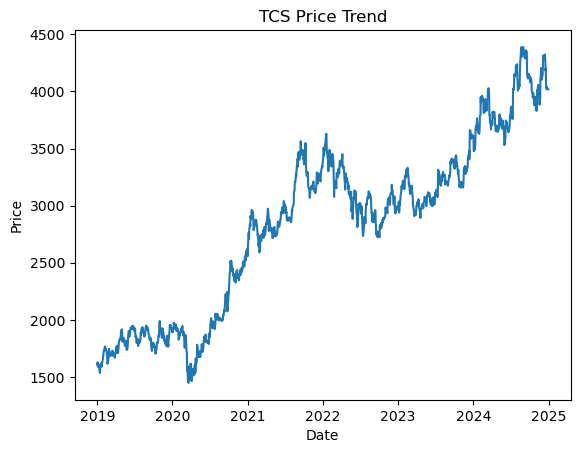

In [93]:
plt.figure() 
plt.plot(df["date"], df["close"]) 
plt.title("TCS Price Trend") 
plt.xlabel("Date") 
plt.ylabel("Price")
plt.show()

In [95]:
df.to_csv("C:/Users/Abhi/Desktop/Python_Data_Analytics_Projects/behavioral-bias-detector/data/processed/TCS_cleaned.csv",index = False )